# Sentiment Analysis

In [2]:
# Loading the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

### Loading and Understanding the data

In [3]:
df = pd.read_csv('sentimentdataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
def sentiment_understanding(data):
    print('The shape of the dataset is: \n', df.shape)
    display('The data information of each columns are: \n')
    print(df.info())
    display('The data description \n', df.describe())
    print('The number of missing values in the dataset are: \n')
    print(df.isnull().sum())

sentiment_understanding(df)

The shape of the dataset is: 
 (732, 15)


'The data information of each columns are: \n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


'The data description \n'

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


The number of missing values in the dataset are: 

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


### Data Preprocessing

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [6]:
# create a copy of the data
df_copy = df.copy()

# Dropping unnecessary columns
df_copy.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'], axis=1, inplace=True)
df_copy.head()

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral


In [7]:
# clean text data
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    text = re.sub(r'\d+', '', text) # remove numbers
    text = text.strip() # remove whitespace
    return text

In [8]:
df_copy.head()

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral


In [9]:
df_copy['Text'] = df_copy['Text'].apply(clean_text)
df_copy['Sentiment'] = df_copy['Sentiment'].apply(clean_text)

In [10]:
df_copy.head()

,Text,Sentiment
0,enjoying a beautiful day at the park,positive
1,traffic was terrible this morning,negative
2,just finished an amazing workout,positive
3,excited about the upcoming weekend getaway,positive
4,trying out a new recipe for dinner tonight,neutral


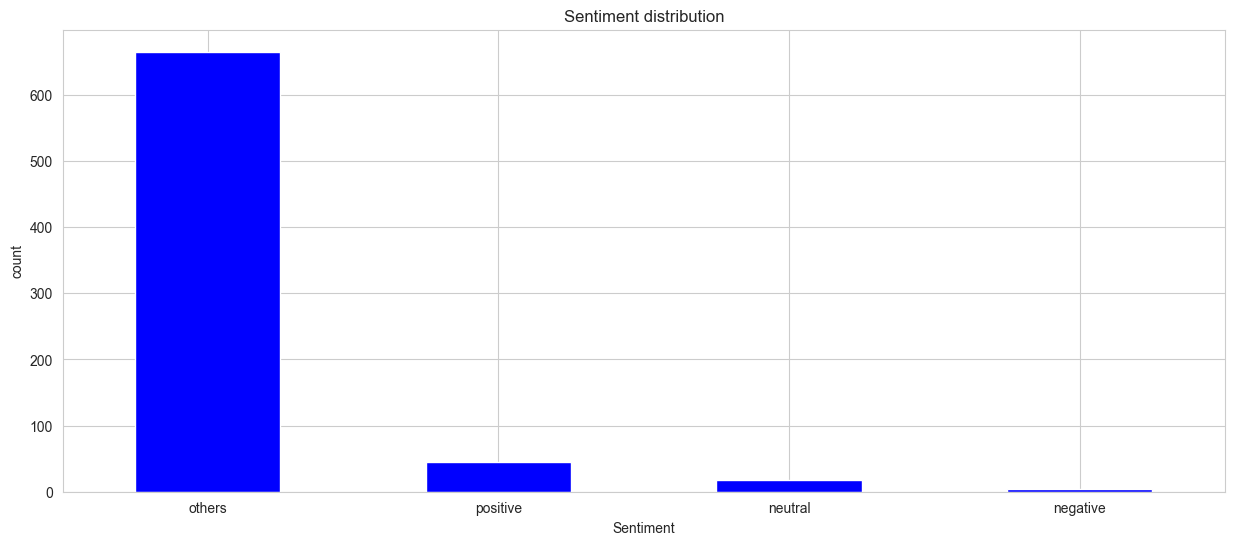

In [11]:
# Updating the sentiment converstion column
def sentiment_converstion(text):
    if text == 'positive':
        return 'positive'
    elif text == 'negative':
        return 'negative'
    elif text == 'neutral':
        return 'neutral'
    else:
        return 'others'
    
# Applying the function to the sentiment column
df_copy['Sentiment'] = df_copy['Sentiment'].apply(sentiment_converstion)

# Checking the updated sentiment distribution
df_copy['Sentiment'].value_counts().plot(kind='bar', figsize=(15,6), color='blue')
plt.title('Sentiment distribution')
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# splitting the text
df_copy['Text'] = df_copy['Text'].str.split()

# Removing stop words
df_copy['Text'] = df_copy['Text'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
df_copy['Text']


0                       [enjoying, beautiful, day, park]
1                           [traffic, terrible, morning]
2                           [finished, amazing, workout]
3                  [excited, upcoming, weekend, getaway]
4                 [trying, new, recipe, dinner, tonight]
                             ...                        
727    [collaborating, science, project, received, re...
728    [attending, surprise, birthday, party, organiz...
729    [successfully, fundraising, school, charity, i...
730    [participating, multicultural, festival, celeb...
731    [organizing, virtual, talent, show, challengin...
Name: Text, Length: 732, dtype: object

In [14]:
# Joining the words back int a single string
df_copy['Text'] = df_copy['Text'].apply(lambda x: ' '.join(x))
df_copy['Text']

0                            enjoying beautiful day park
1                               traffic terrible morning
2                               finished amazing workout
3                       excited upcoming weekend getaway
4                       trying new recipe dinner tonight
                             ...                        
727    collaborating science project received recogni...
728    attending surprise birthday party organized fr...
729    successfully fundraising school charity initia...
730    participating multicultural festival celebrati...
731    organizing virtual talent show challenging tim...
Name: Text, Length: 732, dtype: object

### Feature Extraction

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfid = TfidfVectorizer()
X = tfid.fit_transform(df_copy['Text']).toarray()
y = df_copy['Sentiment']
X.shape, y.shape

((732, 2468), (732,))

### Feature Balancing ---> SMOTE

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled.shape, y_resampled.shape

((2660, 2468), (2660,))

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2128, 2468), (532, 2468), (2128,), (532,))

### Model Build

In [18]:
# Lazy Predict for Classification
from lazypredict.Supervised import LazyClassifier

# Instantiating LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fitting the models
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5918
[LightGBM] [Info] Number of data points in the train set: 2128, number of used features: 215
[LightGBM] [Info] Start training from score -1.397637
[LightGBM] [Info] Start training from score -1.384416
[LightGBM] [Info] Start training from score -1.393842
[LightGBM] [Info] Start training from score -1.369519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,1.00,1.00,None,1.00,0.54
SGDClassifier,1.00,1.00,None,1.00,1.27
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,3.01
CalibratedClassifierCV,1.00,1.00,None,1.00,215.22
RandomForestClassifier,0.99,0.99,None,0.99,2.79
Perceptron,0.99,0.99,None,0.99,0.74
ExtraTreesClassifier,0.99,0.99,None,0.99,6.91
LinearSVC,0.99,0.99,None,0.99,50.72
LogisticRegression,0.99,0.99,None,0.99,0.53


In [19]:
# Working with the model with the best accuracy and F1 score
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_pred = GNB.predict(X_test)
display(GNB_pred, y_test)

array(['neutral', 'others', 'negative', 'neutral', 'negative', 'others',
       'neutral', 'neutral', 'others', 'others', 'neutral', 'negative',
       'others', 'negative', 'others', 'others', 'others', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'negative',
       'positive', 'positive', 'neutral', 'others', 'positive',
       'positive', 'negative', 'negative', 'neutral', 'negative',
       'positive', 'positive', 'neutral', 'positive', 'others',
       'negative', 'others', 'positive', 'others', 'others', 'negative',
       'negative', 'positive', 'others', 'negative', 'others', 'negative',
       'positive', 'positive', 'negative', 'others', 'negative', 'others',
       'positive', 'others', 'positive', 'positive', 'neutral', 'neutral',
       'others', 'positive', 'positive', 'others', 'others', 'negative',
       'others', 'neutral', 'positive', 'neutral', 'negative', 'negative',
       'neutral', 'others', 'neutral', 'positive', 'positive', 'positive',
      

1968     neutral
124       others
1127    negative
1615     neutral
1359    negative
          ...   
821     negative
923     negative
857     negative
1985     neutral
2097    positive
Name: Sentiment, Length: 532, dtype: object

GNB accuracy: 0.9962406015037594
GNB classification:               precision    recall  f1-score   support

    negative       1.00      1.00      1.00       139
     neutral       0.99      1.00      1.00       132
      others       1.00      0.99      0.99       137
    positive       0.99      1.00      1.00       124

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532



<Axes: >

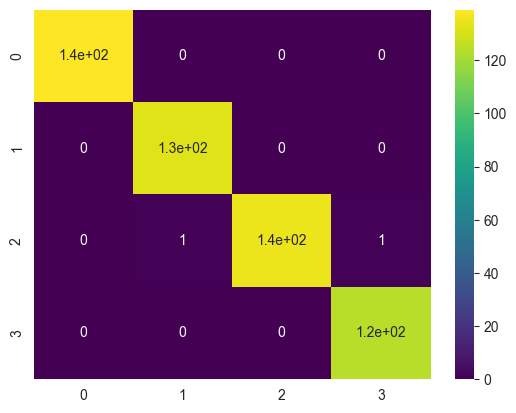

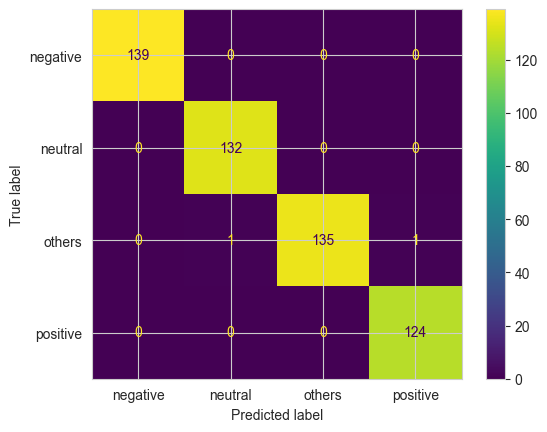

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
GNB_accuracy = accuracy_score(y_test, GNB_pred)
print('GNB accuracy:', GNB_accuracy)

GNB_classification = classification_report(y_test, GNB_pred)
print('GNB classification:', GNB_classification)

GNB_confusion = confusion_matrix(y_test, GNB_pred)
display(sns.heatmap(GNB_confusion, annot=True, cmap= 'viridis'))

ConfusionMatrixDisplay(GNB_confusion, display_labels=['negative', 'neutral', 'others', 'positive']).plot(cmap='viridis')

### Hyperparameter Tuning

In [27]:
# Grid search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the model
model = GaussianNB()

grid_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=model,
                           param_grid=grid_params, scoring='accuracy',
                           cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params, best_score

Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'var_smoothing': 1e-09}, np.float64(0.9943606738470037))

Accuracy: 0.9962406015037594
Classification Report:               precision    recall  f1-score   support

    negative       1.00      1.00      1.00       139
     neutral       0.99      1.00      1.00       132
      others       1.00      0.99      0.99       137
    positive       0.99      1.00      1.00       124

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532

Confusion Matrix: [[139   0   0   0]
 [  0 132   0   0]
 [  0   1 135   1]
 [  0   0   0 124]]


<Figure size 1200x400 with 0 Axes>

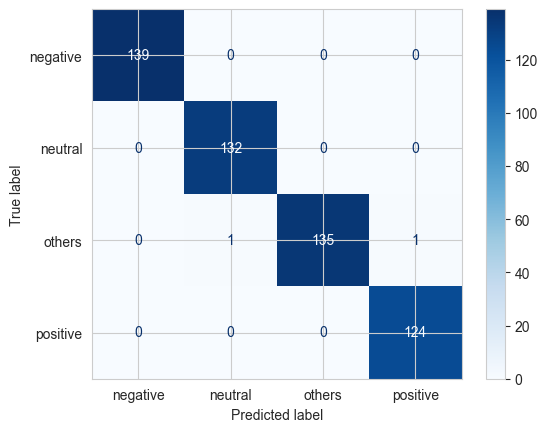

In [28]:
# Evaluating the model
y_pred = grid_search.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:' , classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
plt.figure(figsize=(12,4))

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'neutral', 'others', 'positive'])
disp.plot(cmap=plt.cm.Blues)

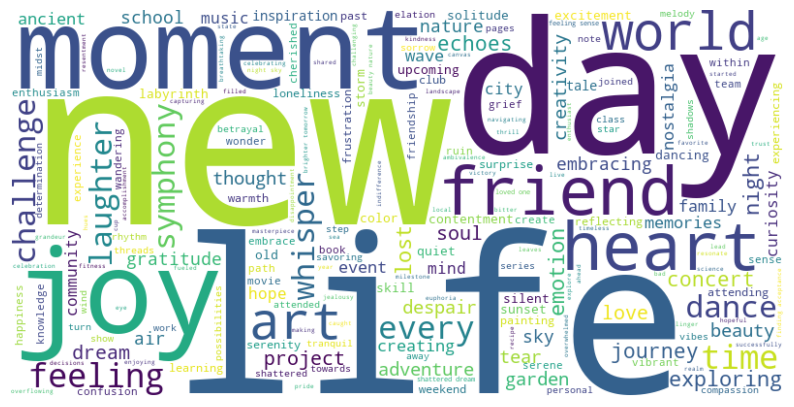

In [35]:
# Word Cloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_copy['Text']))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
from collections import Counter

for sentiment in df_copy['Text'].unique():
    words = ' '.join(df_copy[df_copy['Text']==sentiment]['Text']).split()
    word_counts = Counter(words).most_common(10)
    print(f'\nTop words for: {sentiment}:')
    for word, count in word_counts:
        print(f'{word}: {count}')


Top words for: enjoying beautiful day park:
enjoying: 1
beautiful: 1
day: 1
park: 1

Top words for: traffic terrible morning:
traffic: 1
terrible: 1
morning: 1

Top words for: finished amazing workout:
finished: 1
amazing: 1
workout: 1

Top words for: excited upcoming weekend getaway:
excited: 1
upcoming: 1
weekend: 1
getaway: 1

Top words for: trying new recipe dinner tonight:
trying: 1
new: 1
recipe: 1
dinner: 1
tonight: 1

Top words for: feeling grateful little things life:
feeling: 1
grateful: 1
little: 1
things: 1
life: 1

Top words for: rainy days call cozy blankets hot cocoa:
rainy: 1
days: 1
call: 1
cozy: 1
blankets: 1
hot: 1
cocoa: 1

Top words for: new movie release mustwatch:
new: 1
movie: 1
release: 1
mustwatch: 1

Top words for: political discussions heating timeline:
political: 1
discussions: 1
heating: 1
timeline: 1

Top words for: missing summer vibes beach days:
missing: 1
summer: 1
vibes: 1
beach: 1
days: 1

Top words for: published new blog post check:
published: 1
